# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Ciência de Dados</span>


## <span style='color:SteelBlue; font-size:25px'>Regressão Logística</span>

<span style='color:Gray; font-size:15px'>Desenvolvido por: Alan Figueroa</span>

#### Fonte dos dados
O conjunto de dados da Ames Housing  foi compilado por Dean De Cock para uso na educação em ciência de dados. 

#### Objetivo
Criar um modelo de regressão para prever preços de venda dos imóveis. Usaremos RandomForest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print(f'Python    : {python_version()}')
%reload_ext watermark
%watermark --iversions

Python    : 3.9.7
numpy     : 1.20.3
matplotlib: 3.5.1
pandas    : 1.4.1
seaborn   : 0.11.2



In [2]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train.shape

(1460, 81)

In [5]:
data_test = pd.read_csv('test.csv')

In [6]:
data_test.shape

(1459, 80)

In [7]:
data_all = pd.concat([data_train, data_test], axis=0)

In [8]:
data_all.shape

(2919, 81)

In [9]:
data_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Alterando nome de colunas

In [10]:
# Substituindo nome de colunas que começam com números:
data_all.rename(columns={
    "1stFlrSF" : "FirstFlrSF",
    "2ndFlrSF" : "SecondlrSF",
    "3SsnPorch": "Threeseasonporch"
}, inplace=True)

#### Verificando valores missing

In [11]:
def null_over_0(data):
    df_null = data.isnull().sum().to_frame()
    df_null_vars = df_null[df_null[0]>0].reset_index()
    df_null_vars.columns = ['Coluna','Cont_null']
    return df_null_vars

In [12]:
df_total_null = null_over_0(data_all)
df_total_null

,Coluna,Cont_null
0,MSZoning,4
1,LotFrontage,486
2,Alley,2721
3,Utilities,2
4,Exterior1st,1
5,Exterior2nd,1
6,MasVnrType,24
7,MasVnrArea,23
8,BsmtQual,81
9,BsmtCond,82


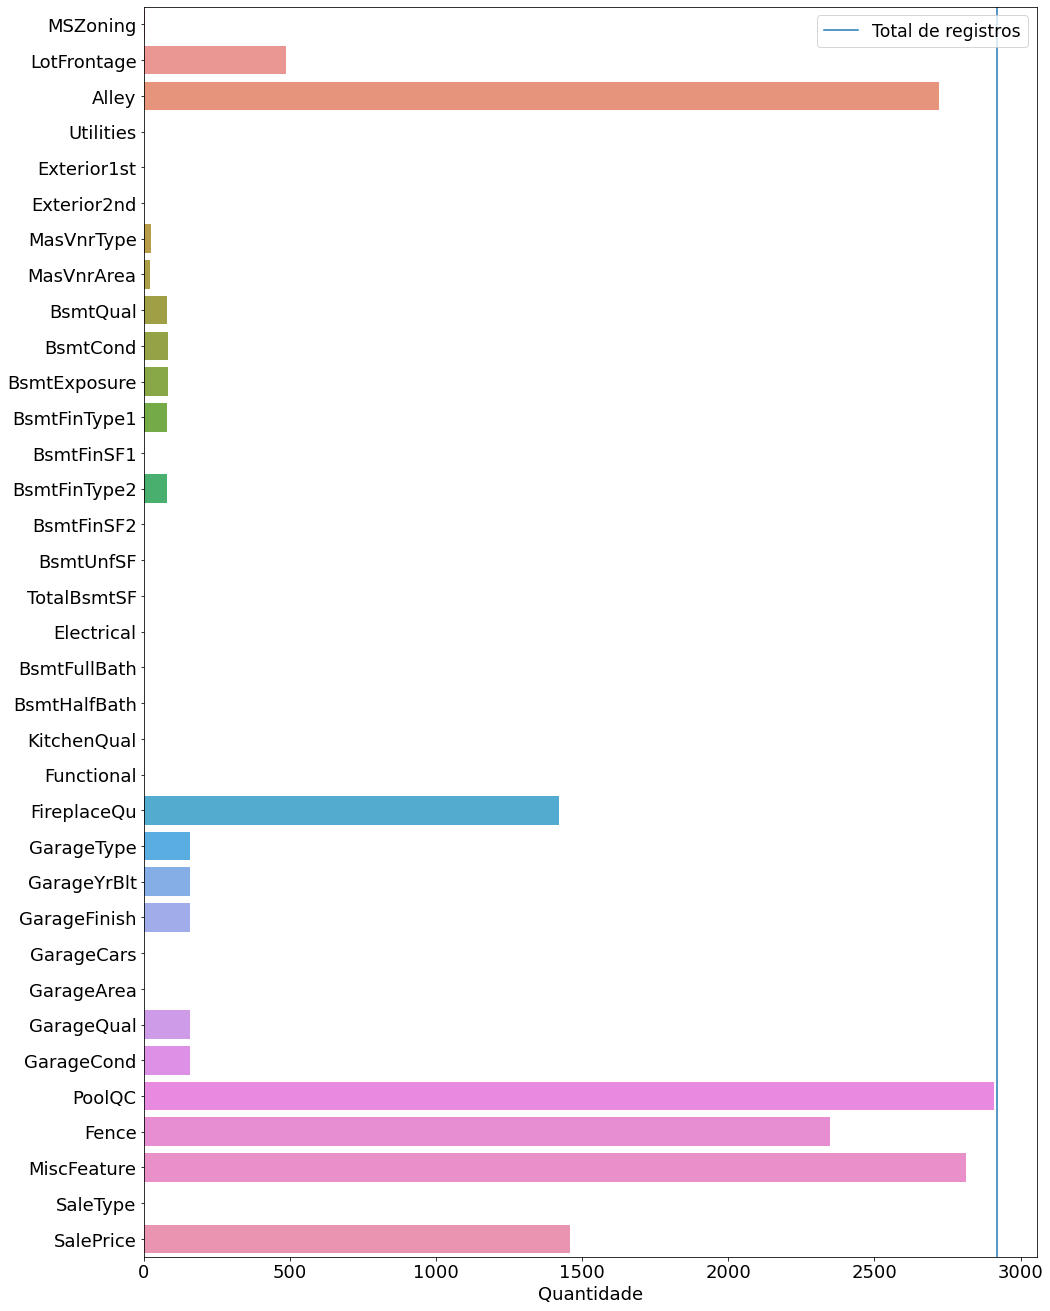

In [13]:
plt.figure(figsize=(16,23))

sns.barplot(data=df_total_null,
            x='Cont_null',
            y='Coluna')
plt.axvline(x=len(data_all), label="Total de registros")
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel("Quantidade", size = 18)
plt.ylabel(None)
plt.legend(loc=1, fontsize ='xx-large')
plt.show()

**Vamos tratar as variáveis com o maior número de valores missing, exceto a variável target.**

#### Tratando FEATURE - Alley

In [14]:
data_all['Alley'] = data_all['Alley'].fillna('no_have')

In [15]:
data_all['Alley'].isnull().sum()

0

#### Tratando FEATURE - FireplaceQu

In [16]:
data_all['FireplaceQu'] = data_all['FireplaceQu'].fillna('no_have')

In [17]:
data_all['FireplaceQu'].isnull().sum()

0

#### Tratando FEATURE - PoolQC
As quantidades missing representam que o imóvel não tem piscina.
Trataremos a variável e criaremos uma novo indicando se o imível tem ou não piscina.

In [18]:
data_all['PoolQC'] = data_all['PoolQC'].fillna('no_have')

In [19]:
data_all['PoolQC'].isnull().sum()

0

In [20]:
data_all['Pool'] = np.where(data_all['PoolQC'] == 'no_have', 0, 1)

#### Tratando FEATURE - Fence

In [21]:
data_all['Fence'] = data_all['Fence'].fillna('no_have')

In [22]:
data_all['Fence'].isnull().sum()

0

#### Tratando FEATURE - MiscFeature

In [23]:
data_all['MiscFeature'] = data_all['MiscFeature'].fillna('no_have')

In [24]:
data_all['MiscFeature'].isnull().sum()

0

#### Tratando FEATURE - LotFrontage
É uma variável numérica que pode conter um valor qualquer de observação. Para tratar os valores missing desta variável usaremos a média de profundidade encontrado nas observações preenchidas para ter uma estimativa  do tamanho da fachada.

In [25]:
mean_depth = 140

In [26]:
data_all['LotFrontage'] = data_all['LotFrontage'].fillna(data_all['LotArea'] / mean_depth)

In [27]:
data_all['LotFrontage'].isnull().sum()

0

#### Verificando se as transformações foram realizadas com sucesso.

In [28]:
data_all.isnull().sum().to_frame().T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,0,0,4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,24,23,0,0,0,81,82,82,79,1,80,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,1,0,2,0,0,157,159,159,1,1,159,159,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1459,0


#### Vamos realizar o tratamento dos valores missing restantes com a eliminação dessas observações, uma vez que a quantidade é pequena em relação ao dataset. Lógicamente não eliminaremos a variável TARGET.

In [29]:
dataset_1 = data_all.copy()

In [30]:
dataset_1.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,1,60,RL,65.0,8450,Pave,no_have,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,no_have,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,no_have,no_have,no_have,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,no_have,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,no_have,no_have,no_have,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,no_have,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,no_have,no_have,no_have,0,9,2008,WD,Normal,223500.0,0


In [31]:
dataset_1.shape

(2919, 82)

In [32]:
dataset_1.set_index('Id', inplace=True)

In [33]:
features = dataset_1.drop(columns='SalePrice')

In [34]:
target = dataset_1['SalePrice']

In [35]:
# Verificando quantos valores missing ainda possuimos
features.isnull().sum().to_frame().T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pool
0,0,4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,24,23,0,0,0,81,82,82,79,1,80,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,1,0,2,0,0,157,159,159,1,1,159,159,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Apagando valores missing restantes:
features.dropna(inplace=True)

In [37]:
# VErificando quantas observações foram removidas.
len(features)

2657

In [38]:
dataset_2 = pd.concat([features,target], join='inner', axis=1)
dataset_2.reset_index(drop=True, inplace=True)
dataset_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pool,SalePrice
0,60,RL,65.0,8450,Pave,no_have,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,no_have,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,no_have,no_have,no_have,0,2,2008,WD,Normal,0,208500.0
1,20,RL,80.0,9600,Pave,no_have,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,no_have,no_have,no_have,0,5,2007,WD,Normal,0,181500.0
2,60,RL,68.0,11250,Pave,no_have,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,no_have,no_have,no_have,0,9,2008,WD,Normal,0,223500.0
3,70,RL,60.0,9550,Pave,no_have,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,no_have,no_have,no_have,0,2,2006,WD,Abnorml,0,140000.0
4,60,RL,84.0,14260,Pave,no_have,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,no_have,no_have,no_have,0,12,2008,WD,Normal,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,20,RL,80.0,13384,Pave,no_have,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,TA,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,0,0,0,no_have,no_have,no_have,0,5,2006,WD,Normal,0,NaN
2653,160,RM,21.0,1533,Pave,no_have,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,no_have,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,no_have,no_have,no_have,0,12,2006,WD,Abnorml,0,NaN
2654,160,RM,21.0,1894,Pave,no_have,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,no_have,CarPort,19

In [39]:
dataset_2.isnull().sum().to_frame().rename(columns={0:"Quant"})

,Quant
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [40]:
# Criando um arquivo com os tratamentos realizados:
dataset_2.to_csv('dataset_clean.csv', index=False)

___

In [41]:
# Carregando arquivo para segunda etapa:
df_clean = pd.read_csv('dataset_clean.csv')

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2657 non-null   int64  
 1   MSZoning          2657 non-null   object 
 2   LotFrontage       2657 non-null   float64
 3   LotArea           2657 non-null   int64  
 4   Street            2657 non-null   object 
 5   Alley             2657 non-null   object 
 6   LotShape          2657 non-null   object 
 7   LandContour       2657 non-null   object 
 8   Utilities         2657 non-null   object 
 9   LotConfig         2657 non-null   object 
 10  LandSlope         2657 non-null   object 
 11  Neighborhood      2657 non-null   object 
 12  Condition1        2657 non-null   object 
 13  Condition2        2657 non-null   object 
 14  BldgType          2657 non-null   object 
 15  HouseStyle        2657 non-null   object 
 16  OverallQual       2657 non-null   int64  


### Transformação de variáveis

In [44]:
# Lista com variáveis numéricas:
numerical_vars = df_clean.select_dtypes(np.number).columns
numerical_vars = numerical_vars.drop('MSSubClass')
numerical_vars
# Retirando a variável 'MSSubClass' da lista pois representa uma variável categótrica

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'FirstFlrSF', 'SecondlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Threeseasonporch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Pool', 'SalePrice'],
      dtype='object')

In [45]:
# Lista variáveis categóricas e acrescentado a variável 'MSSubClass'
object_vars = df_clean.select_dtypes(object).columns
object_vars = object_vars.insert(0,'MSSubClass')
object_vars

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
# Dividindo conjunto de dados para treino e teste:
df_train = df_clean[df_clean['SalePrice'].notnull()]
df_test  = df_clean[df_clean['SalePrice'].isnull()]

#### Padronizando variáveis numéricas

In [47]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
for col in numerical_vars:
    df_train[col] = scaler_train.fit_transform(df_train[col].array.reshape(-1, 1))

#### Codificando variáveis Categoricas

In [48]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for col in object_vars:
    df_train[col] = lbl.fit_transform(df_train[col].array.reshape(-1, 1))

#### Dividindo os dados em Features e Target

In [49]:
X = df_train.drop(columns='SalePrice').values
y = df_train.SalePrice.values.reshape(-1,1)

#### Dividindo os dados em treino e teste

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=34)

#### Modelo

In [51]:
from sklearn.ensemble import RandomForestRegressor
# Criando o modelo
modelo = RandomForestRegressor()
# Treinando
modelo.fit(X_train,y_train.ravel())

RandomForestRegressor()

In [52]:
# Realizando previsão com o modelo treinado:
y_pred = modelo.predict(X_test)

#### Avaliando o modelo

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Mean_Square_Error: ", round(mean_squared_error(y_test, y_pred),3))
print("R-Square: ", round(r2_score(y_test, y_pred),2))

Mean_Square_Error:  0.094
R-Square:  0.89


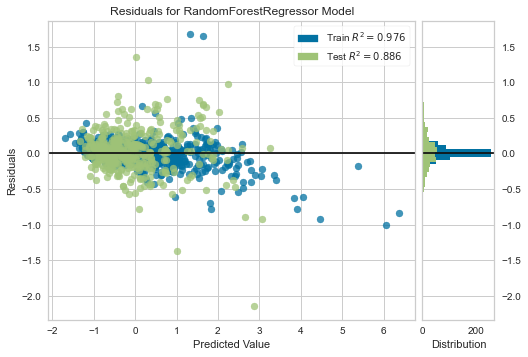

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(modelo)
viz.fit(X_train,y_train.ravel())
viz.score(X_test,y_test.ravel())
viz.show()

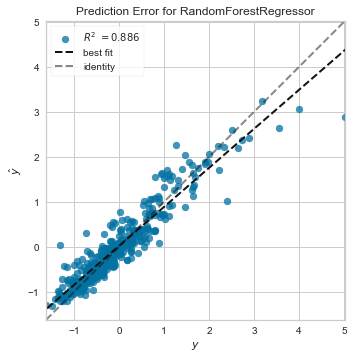

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
from yellowbrick.regressor import PredictionError
viz_2 = PredictionError(modelo)
viz_2.fit(X_train,y_train)
viz_2.score(X_test, y_test)
viz_2.show()

#### Realizando a previsão em dados desconhecidos

In [56]:
df_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pool,SalePrice
1338,20,RH,80.0,11622,Pave,no_have,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,no_have,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,no_have,MnPrv,no_have,0,6,2010,WD,Normal,0,NaN
1339,20,RL,81.0,14267,Pave,no_have,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,no_have,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,no_have,no_have,Gar2,12500,6,2010,WD,Normal,0,NaN
1340,60,RL,74.0,13830,Pave,no_have,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,no_have,MnPrv,no_have,0,3,2010,WD,Normal,0,NaN


In [57]:
# Retiranndo a variável target do conjunto (Variável presente que está preenchida de valores ausentes)
X_t = df_test.drop(columns='SalePrice')

In [58]:
# Aplicando as transformações necessárias para o algoritmo

# Padronizando variáveis numéricas
scaler_test = StandardScaler()
for col in numerical_vars.drop('SalePrice'):
    X_t[col] = scaler_test.fit_transform(X_t[col].array.reshape(-1, 1))
    
    # Codificando variáveis categóricas
lbl_test = LabelEncoder()
for col in object_vars:
    X_t[col] = lbl_test.fit_transform(X_t[col].array.reshape(-1, 1))

In [59]:
# Transformando em um array:
X_t = X_t.values

In [61]:
# Previsão
y_t_pred = modelo.predict(X_t)

In [62]:
y_t_pred

array([-0.7550499 , -0.36569714, -0.03084557, ..., -1.15765129,
       -0.39930495,  0.60494884])

In [63]:
resultados = scaler_train.inverse_transform(y_t_pred.reshape(-1,1))

In [65]:
pd.DataFrame(resultados).rename(columns={0:"Previous_SalePrice"}).head()

,Previous_SalePrice
0,127200.16
1,157914.00
2,184328.55
3,187497.90
4,210305.50


In [66]:
df_resultado = df_test.reset_index(drop=True)

In [67]:
df_resultado['SalePrice'] = resultados

In [68]:
df = df_resultado.iloc[:,[0,1,3,18,11,50,79,80]]
df.rename(columns={"SalePrice":"Previous_SalePrice"}, inplace=True)
# Visualização das previsões:
df

,MSSubClass,MSZoning,LotArea,YearBuilt,Neighborhood,BedroomAbvGr,Pool,Previous_SalePrice
0,20,RH,11622,1961,NAmes,2,0,127200.16
1,20,RL,14267,1958,NAmes,3,0,157914.00
2,60,RL,13830,1997,Gilbert,3,0,184328.55
3,60,RL,9978,1998,Gilbert,3,0,187497.90
4,120,RL,5005,1992,StoneBr,2,0,210305.50
...,...,...,...,...,...,...,...,...
1314,20,RL,13384,1969,Mitchel,3,0,159014.52
1315,160,RM,1533,1970,MeadowV,3,0,97944.32
1316,160,RM,1894,1970,MeadowV,3,0,95441.21
1317,20,RL,20000,1960,Mitchel,4,0,155262.87
